# Introduction
This note book provides the demostration of geospatial data handling shown during the labs for reference.

## Import the gdal

In [2]:
from osgeo import gdal

## Explore the inputdata file

In [ ]:
inputfile="sometif.tif"
inputfile="./data/LC08_L1TP_146039_20211229_20220106_01_T1/LC08_L1TP_146039_20211229_20220106_01_T1_stack.tif"
dataset=gdal.Open(inputfile)

In [11]:
dataset.GetDriver().ShortName

'GTiff'

In [15]:
dataset.GetDriver().ShortName #Provides the Driver name
dataset.RasterXSize,dataset.RasterYSize #Provides the pixels and lines in image
noOfbands=dataset.RasterCount #Total number of bands presents in the input image
dataset.GetProjection() #Get the project details
trans=dataset.GetGeoTransform() #Get the cordinate referene and X and Y pixel size
band=dataset.GetRasterBand(1) # Read the first band
data=band.ReadAsArray() #Provides the data in numpy format
dataset.GetRasterBand(1).GetNoDataValue() #The values used for represting the NA value

In [19]:
print(trans) 
print(data.shape)

(123885.0, 30.0, 0.0, 3474015.0, 0.0, -30.0)
(7911, 7771)


## Compute the extent of image

In [33]:
(minx,minxx,miny,minyy)=(trans[0],trans[0]+trans[1]*data.shape[1],trans[3]+trans[5]*data.shape[0],trans[3])

In [34]:
print(minx,minxx,miny,minyy)

123885.0 357015.0 3236685.0 3474015.0


## Plot the image

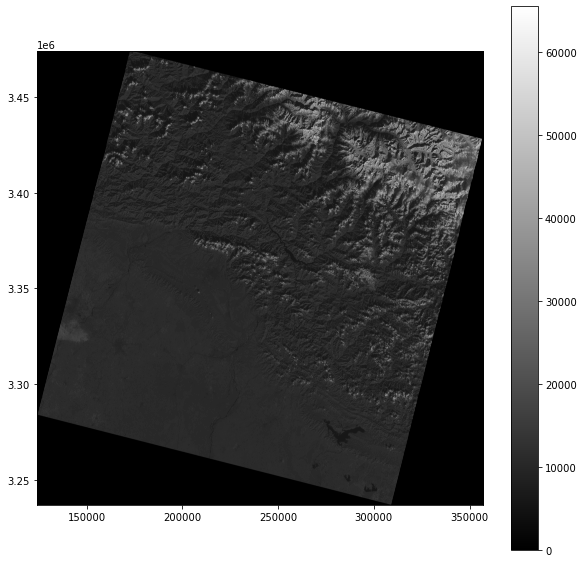

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(data,extent=(minx,minxx,miny,minyy),cmap='gray')
plt.colorbar()

## Plot the indivdual bands

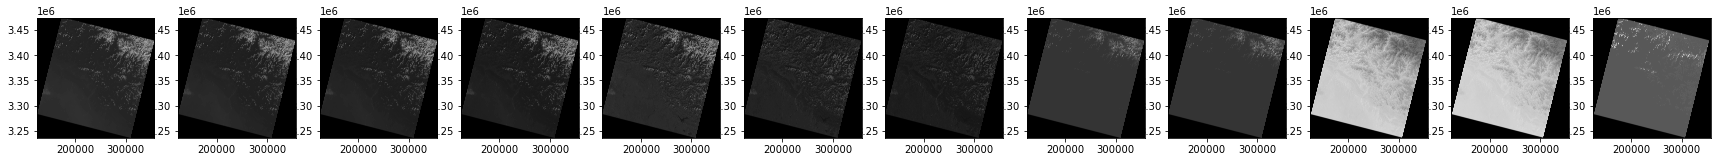

In [37]:
plt.figure(figsize=(30,30))
for i in range(1,noOfbands+1):
    band=dataset.GetRasterBand(i)
    data=band.ReadAsArray()
    plt.subplot(1,noOfbands,i)
    plt.imshow(data,cmap='gray',extent=(minx,minxx,miny,minyy))
dataset = None

In [39]:
data.shape

(7911, 7771)

# Creating a output file

In [41]:
fileFormat='GTiff'
noOfBands=1
driver=gdal.GetDriverByName(fileFormat)
dst_filename='Lecture2Out.tif'
data=data+20
yrow,xcol=data.shape
outDS=driver.Create(dst_filename,xsize=data.shape[1],ysize=data.shape[0],bands=noOfBands,eType=gdal.GDT_Byte)

## Setting the georeference system to output file

In [ ]:
from osgeo import osr
dataset.GetProjection()
srs=osr.SpatialReference()
srs.setUTM(44,1)
srs.setWellKnownGeoCS('WGS84')

In [ ]:
outDS.SetGeoTransform(dataset.GetGeoTransform)  #Setting the cordinate reference 
outDS.SetProjection(srs.ExportToWkt()) #Seting the paramter for the projection which we need. Here it is WGS84,UTM

In [ ]:
out_band=outDS.GetRasterBand(1) #Creating the bands which will be written by the data
out_band.WriteArray(data) #Write the data into the raster band

outDS = None

# Reading the ESRI shape file

In [ ]:
import geopandas as gdp
location=gdp.read_file('locs.shp')
type(location)
location.head(locations)
location.crs

In [ ]:
fix,ax1=plt.subplot(figsize=(10,8))
lcoation.plot(ax1)

In [ ]:
location.plot()
plt.imshow(data,extent=(minx,minxx,miny,minyy),cmap='gray')

In [ ]:
location.to_file("newshapeFile.shp")

In [89]:
inputfile="/Users/ashutosh/Documents/GitHub/usgsm2m/LC08_L1TP_146039_20211229_20220106_01_T1/LC08_L1TP_146039_20211229_20220106_01_T1_stack.tif"
#dataset=gdal.Open(inputfile)
import os
from itertools import product
d=5000

def tile(filename,d, dir_in=None, dir_out=None):
    if(dir_in):
        filename=os.path.join(dir_in,filename)
    name, ext = os.path.splitext(filename)
    if(not dir_out):
        dir_out = os.path.dirname(filename)
    dataset=gdal.Open(inputfile)
    trans=dataset.GetGeoTransform()
    w, h = dataset.RasterXSize,dataset.RasterYSize
    print(trans)
    grid = product(range(0, h-h%d+1, d), range(0, w-w%d+1, d))
    for i, j in grid:
        box = (j, i, h if j+d>h else j+d, w if i+d>w else i+d)
        box = (j, i, j+d, i+d)
        (minx,minxx,miny,minyy)=(trans[0]+trans[1]*box[0],trans[0]+trans[1]*box[2],trans[3]+trans[5]*box[1],trans[3]+trans[5]*box[3])    
        out = os.path.join(dir_out, f'{name}_{i}_{j}{ext}')
        print(box)
        print((minx,minxx,miny,minyy))
        dsOut=gdal.Translate(out, dataset, srcWin=(j,i,d,d),noData=dataset.GetRasterBand(1).GetNoDataValue())
        dsOut=None
        #img.crop(box).save(out)
tile(inputfile,2500)

(123885.0, 30.0, 0.0, 3474015.0, 0.0, -30.0)
(0, 0, 2500, 2500)
(123885.0, 198885.0, 3474015.0, 3399015.0)
(2500, 0, 5000, 2500)
(198885.0, 273885.0, 3474015.0, 3399015.0)
(5000, 0, 7500, 2500)
(273885.0, 348885.0, 3474015.0, 3399015.0)
(7500, 0, 10000, 2500)
(348885.0, 423885.0, 3474015.0, 3399015.0)
(0, 2500, 2500, 5000)
(123885.0, 198885.0, 3399015.0, 3324015.0)
(2500, 2500, 5000, 5000)
(198885.0, 273885.0, 3399015.0, 3324015.0)
(5000, 2500, 7500, 5000)
(273885.0, 348885.0, 3399015.0, 3324015.0)
(7500, 2500, 10000, 5000)
(348885.0, 423885.0, 3399015.0, 3324015.0)
(0, 5000, 2500, 7500)
(123885.0, 198885.0, 3324015.0, 3249015.0)
(2500, 5000, 5000, 7500)
(198885.0, 273885.0, 3324015.0, 3249015.0)
(5000, 5000, 7500, 7500)
(273885.0, 348885.0, 3324015.0, 3249015.0)
(7500, 5000, 10000, 7500)
(348885.0, 423885.0, 3324015.0, 3249015.0)
(0, 7500, 2500, 10000)
(123885.0, 198885.0, 3249015.0, 3174015.0)
(2500, 7500, 5000, 10000)
(198885.0, 273885.0, 3249015.0, 3174015.0)
(5000, 7500, 7500, 100